# Python for data analysis : Drug consumption case
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", header = None)
# !ls /datasets/drug_consumption_dataset
# dataset = pd.read_csv("/datasets/drug_consumption_dataset/drug_consumption.data", header = None)

columns = ['ID', 'AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 
        'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING', 'ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']
dataset.columns = columns

In [3]:
dataset.shape

(1885, 32)

In [4]:
dataset.head(15)

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
# Remplacer les valeurs chiffrées bizarres en données compréhensibles
def age(value): 
    value = round(value, 5)
    if value == -0.95197: 
        value = "18-24"
    elif value == -0.07854: 
        value = "25-34"
    elif value == 0.49788: 
        value = "35-44"
    elif value == 1.09449: 
        value = "45-54"
    elif value == 1.82213: 
        value = "55-64"
    elif value == 2.59171: 
        value = "65+"
    else: 
        value = "undetermined"
    return value


In [6]:
def education_level(value): 
    value = round(value, 5)
    if value == -2.43591: 
        value = "Left school before 16 years"
    elif value == -1.73790: 
        value = "Left school at 16 years"
    elif value == -1.43719: 
        value = "Left school at 17 years"
    elif value == -1.22751: 
        value = "Left school at 18 years"
    elif value == -0.61113: 
        value = "Some college or university, no certificate or degree"
    elif value == -0.05921: 
        value = "Professional certificate/diploma"
    elif value == 0.45468: 
        value = "University degree"
    elif value == 1.16365: 
        value = "Masters degree"
    elif value == 1.98437: 
        value = "Doctorate degree"
    else: 
        value = "undetermined"
    return value

In [7]:
def country(value): 
    value = round(value, 5)
    if value == -0.09765: 
        value = "Australia"
    elif value == 0.24923: 
        value = "Canada"
    elif value == -0.46841: 
        value = "New Zealand"
    elif value == -0.28519: 
        value = "Other"
    elif value == 0.21128: 
        value = "Republic of Ireland"
    elif value == 0.96082: 
        value = "UK"
    elif value == -0.57009: 
        value = "USA"
    else: 
        value = "undetermined"
    return value

In [8]:
def ethnicity(value): 
    value = round(value, 5)
    if value == -0.50212: 
        value = "Asian"
    elif value == -1.10702: 
        value = "Black"
    elif value == 1.90725: 
        value = "Mixed-Black/Asian"
    elif value == 0.12600: 
        value = "Mixed-White/Asian"
    elif value == -0.22166: 
        value = "Mixed-White/Black"
    elif value == 0.11440: 
        value = "Other"
    elif value == -0.31685: 
        value = "White"
    else: 
        value = "undetermined"
    return value

In [9]:
def score(value, score_type): 
    unique_values = dataset[score_type].unique()
    unique_values.sort()
    unique_values = np.around(unique_values, 5)
    value = round(value, 5)
    index = np.where(unique_values == value)
    return index[0][0]

def n_score(value): 
    unique_values = dataset.NSCORE_VALUE.unique()
    scores = [12+i for i in range(len(unique_values))]
    return scores[score(value, "NSCORE_VALUE")]
    
def e_score(value): 
    unique_values = dataset.ESCORE_VALUE.unique()
    scores = [16+i for i in range(len(unique_values))]
    return scores[score(value, "ESCORE_VALUE")]

def o_score(value): 
    unique_values = dataset.OSCORE_VALUE.unique()
    scores = [24+i for i in range(len(unique_values))]
    return scores[score(value, "OSCORE_VALUE")]

def a_score(value): 
    unique_values = dataset.ASCORE_VALUE.unique()
    scores = [12+i for i in range(len(unique_values))]
    return scores[score(value, "ASCORE_VALUE")]

def c_score(value): 
    unique_values = dataset.CSCORE_VALUE.unique()
    scores = [17+i for i in range(len(unique_values))]
    return scores[score(value, "CSCORE_VALUE")]


In [10]:
dataset.GENDER = dataset.GENDER.apply(lambda sex : "F" if sex > 0 else "M")
dataset.AGE = dataset.AGE.apply(age)
dataset.EDUCATION_LEVEL = dataset.EDUCATION_LEVEL.apply(education_level)
dataset.COUNTRY = dataset.COUNTRY.apply(country)
dataset.ETHNICITY = dataset.ETHNICITY.apply(ethnicity)
dataset.NSCORE_VALUE = dataset.NSCORE_VALUE.apply(n_score)
dataset.OSCORE_VALUE = dataset.OSCORE_VALUE.apply(o_score)
dataset.ESCORE_VALUE = dataset.ESCORE_VALUE.apply(e_score)
dataset.ASCORE_VALUE = dataset.ASCORE_VALUE.apply(a_score)
dataset.CSCORE_VALUE = dataset.CSCORE_VALUE.apply(c_score)

In [73]:
dataset.ALCOHOL_CONSUMPTION.unique()

array(['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3'], dtype=object)

In [12]:
repartition_gender = dataset.groupby("GENDER").GENDER.count()
repartition_age = dataset.groupby("AGE").AGE.count()
repartition_country = dataset.groupby("COUNTRY").COUNTRY.count()

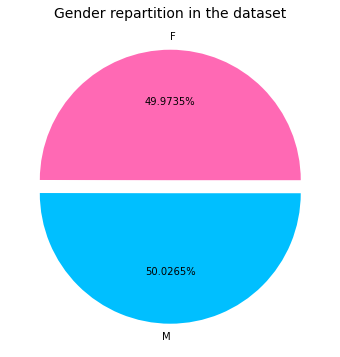

In [13]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = repartition_gender, 
        labels = repartition_gender.index, 
        explode = [0.05]*len(repartition_gender), 
        autopct="%.4f%%", 
        colors = ["hotpink", "deepskyblue"])
plt.title("Gender repartition in the dataset", fontsize=14);
pie.savefig("charts/GenderRepartition.png")

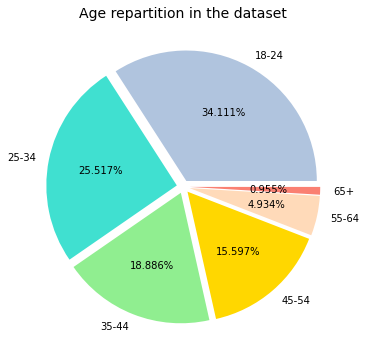

In [14]:
colors = ['lightsteelblue', 'turquoise', 'lightgreen', 'gold', 'peachpuff', 'salmon']
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = repartition_age, 
        labels = repartition_age.index, 
        explode = [0.05]*len(repartition_age), 
        autopct="%.3f%%", colors = colors)
plt.title("Age repartition in the dataset", fontsize=14);
pie.savefig("charts/AgeRepartition.png")

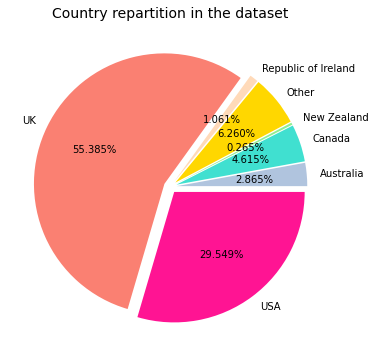

In [15]:
colors = ['lightsteelblue', 'turquoise', 'lightgreen', 'gold', 'peachpuff', 'salmon', 'deeppink']
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = repartition_country, 
        labels = repartition_country.index, 
        explode = [0.05]*len(repartition_country), 
        autopct="%.3f%%", colors = colors)
plt.title("Country repartition in the dataset", fontsize=14);
pie.savefig("charts/CountryRepartition.png")

In [16]:
'''
['ID', 'AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 
'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING', 'ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']
'''
alcohol_consumption = dataset.groupby('ALCOHOL_CONSUMPTION').ALCOHOL_CONSUMPTION.count()
amphet_consumption = dataset.groupby('AMPHET_CONSUMPTION').AMPHET_CONSUMPTION.count()
amyl_consumption = dataset.groupby('AMYL_CONSUMPTION').AMYL_CONSUMPTION.count()
benzos_consumption = dataset.groupby('BENZOS_CONSUMPTION').BENZOS_CONSUMPTION.count()
caffeine_consumption = dataset.groupby('CAFFEINE_CONSUMPTION').CAFFEINE_CONSUMPTION.count()
cannabis_consumption = dataset.groupby('CANNABIS_CONSUMPTION').CANNABIS_CONSUMPTION.count()
chocolate_consumption = dataset.groupby('CHOCOLATE_CONSUMPTION').CHOCOLATE_CONSUMPTION.count()
coke_consumption = dataset.groupby('COKE_CONSUMPTION').COKE_CONSUMPTION.count()
crack_consumption = dataset.groupby('CRACK_CONSUMPTION').CRACK_CONSUMPTION.count()
ecstasy_consumption = dataset.groupby('ECSTASY_CONSUMPTION').ECSTASY_CONSUMPTION.count()
heroin_consumption = dataset.groupby('HEROIN_CONSUMPTION').HEROIN_CONSUMPTION.count()
ketamine_consumption = dataset.groupby('KETAMINE_CONSUMPTION').KETAMINE_CONSUMPTION.count()
legal_highs_consumption = dataset.groupby('LEGAL_HIGHS_CONSUMPTION').LEGAL_HIGHS_CONSUMPTION.count()
lsd_consumption = dataset.groupby('LSD_CONSUMPTION').LSD_CONSUMPTION.count()
meth_consumption = dataset.groupby('METH_CONSUMPTION').METH_CONSUMPTION.count()
magic_mushrooms_consumption = dataset.groupby('MAGIC_MUSHROOMS_CONSUMPTION').MAGIC_MUSHROOMS_CONSUMPTION.count()
nicotine_consumption = dataset.groupby('NICOTINE_CONSUMPTION').NICOTINE_CONSUMPTION.count()
semer_consumption = dataset.groupby('SEMER_CONSUMPTION').SEMER_CONSUMPTION.count()
vsa_consumption = dataset.groupby('VSA_CONSUMPTION').VSA_CONSUMPTION.count()

In [17]:
all_drugs = []
all_drugs.append(alcohol_consumption)
all_drugs.append(amphet_consumption)
all_drugs.append(amyl_consumption)
all_drugs.append(benzos_consumption)
all_drugs.append(caffeine_consumption)
all_drugs.append(cannabis_consumption)
all_drugs.append(chocolate_consumption)
all_drugs.append(coke_consumption)
all_drugs.append(crack_consumption)
all_drugs.append(ecstasy_consumption)
all_drugs.append(heroin_consumption)
all_drugs.append(ketamine_consumption)
all_drugs.append(legal_highs_consumption)
all_drugs.append(lsd_consumption)
all_drugs.append(meth_consumption)
all_drugs.append(magic_mushrooms_consumption)
all_drugs.append(nicotine_consumption)
all_drugs.append(semer_consumption)
all_drugs.append(vsa_consumption)

In [18]:
all_drugs_labels = [all_drugs[i].name for i in range(len(all_drugs))]
last_24h = [all_drugs[i][-1] for i in range(len(all_drugs))]
never_consumed = [all_drugs[i][0] for i in range(len(all_drugs))]

# never_consumed_any_drug = None

In [19]:
last_24h

[505, 102, 3, 95, 1385, 463, 807, 19, 2, 21, 13, 4, 67, 13, 73, 4, 610, 1, 7]

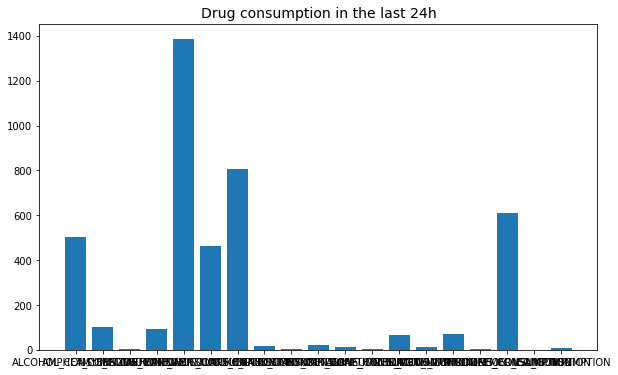

In [20]:
pie, ax = plt.subplots(figsize=[10,6])
plt.bar(all_drugs_labels, last_24h)
plt.title("Drug consumption in the last 24h", fontsize=14);
#pie.savefig("charts/CountryRepartition.png")


In [21]:
last_24h_consumption = pd.DataFrame(list(zip(all_drugs_labels,last_24h)), columns= ['DRUG','COUNT'])
last_24h_consumption.sort_values(by=['COUNT'], inplace=True, ascending=False)

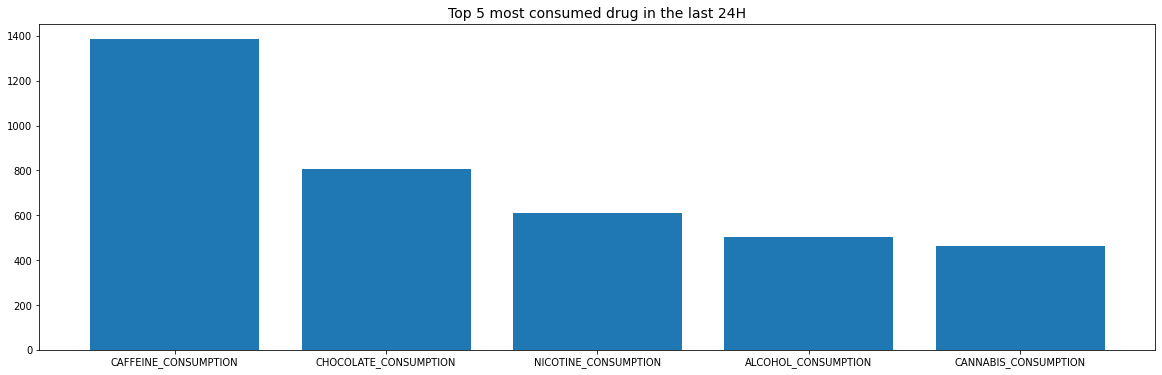

In [22]:
pie, ax = plt.subplots(figsize=[20,6])
plt.bar(last_24h_consumption.DRUG.head(), last_24h_consumption.COUNT.head())
plt.title("Top 5 most consumed drug in the last 24H", fontsize=14);
#pie.savefig("charts/CountryRepartition.png")

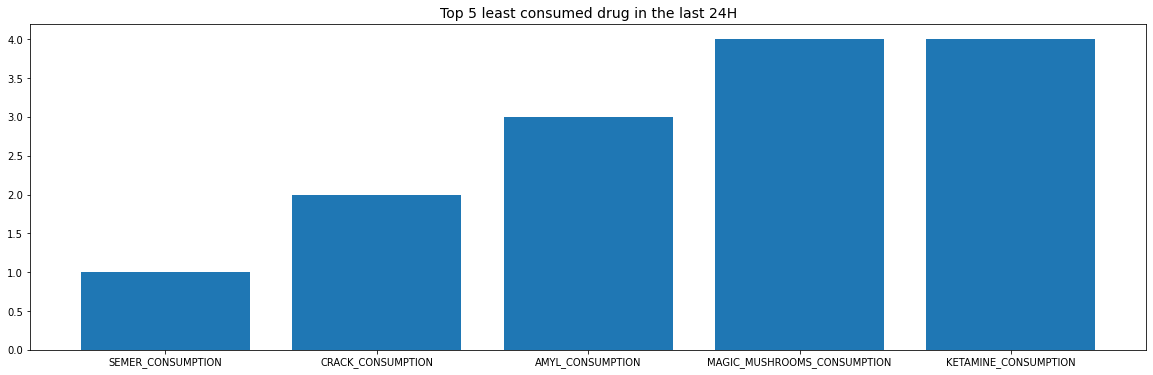

In [23]:
last_24h_consumption.sort_values(by=['COUNT'], inplace=True, ascending=True)
pie, ax = plt.subplots(figsize=[20,6])
plt.bar(last_24h_consumption.DRUG.head(), last_24h_consumption.COUNT.head())
plt.title("Top 5 least consumed drug in the last 24H", fontsize=14);
#pie.savefig("charts/CountryRepartition.png")

In [24]:
never_consumed = pd.DataFrame(list(zip(all_drugs_labels,never_consumed)), columns= ['DRUG','COUNT'])
never_consumed.sort_values(by=['COUNT'], inplace=True, ascending=False)
never_consumed

,DRUG,COUNT
17,SEMER_CONSUMPTION,1877
8,CRACK_CONSUMPTION,1627
10,HEROIN_CONSUMPTION,1605
11,KETAMINE_CONSUMPTION,1490
18,VSA_CONSUMPTION,1455
14,METH_CONSUMPTION,1429
2,AMYL_CONSUMPTION,1305
12,LEGAL_HIGHS_CONSUMPTION,1094
13,LSD_CONSUMPTION,1069
7,COKE_CONSUMPTION,1038


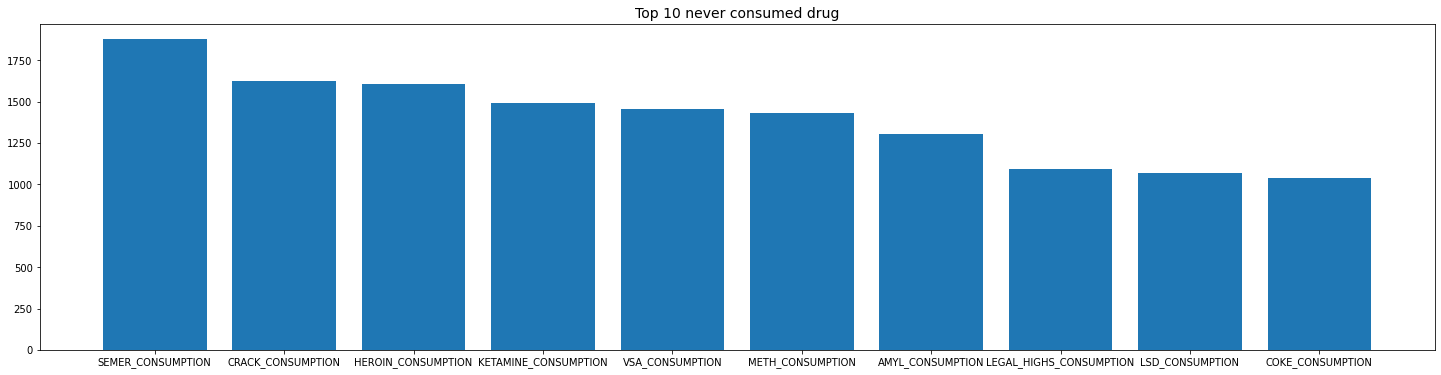

In [31]:
pie, ax = plt.subplots(figsize=[25,6])
plt.bar(never_consumed.DRUG.head(10), never_consumed.COUNT.head(10))
plt.title("Top 10 never consumed drug", fontsize=14);
#pie.savefig("charts/CountryRepartition.png")


In [104]:
drug_used_in_24h = ((dataset.iloc[:,13:] == "CL6").sum(axis = 1))
max_drug_used_in_24h = drug_used_in_24h.sort_values().max()
most_druged_person = dataset[drug_used_in_24h  == max_drug_used_in_24h ]
most_druged_person

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
979,983,18-24,M,"Some college or university, no certificate or ...",UK,White,46,46,36,29,...,CL4,CL0,CL0,CL6,CL0,CL6,CL0,CL6,CL0,CL2


In [71]:
# There is only a single person who has never consumed any presented drug 
# I think he is a liar, I don't think he has never consumed any chocolate in his life ... 

never_consumed_any_drug = dataset[(dataset.iloc[:,13:] == "CL0").sum(axis = 1)  >= 19 ]
never_consumed_any_drug

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
1277,1281,18-24,M,University degree,UK,Asian,44,43,38,20,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


In [114]:
(dataset.iloc[:,13:] == "CL6").sum(axis = 0)

/opt/venv/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ALCOHOL_CONSUMPTION             505
AMPHET_CONSUMPTION              102
AMYL_CONSUMPTION                  3
BENZOS_CONSUMPTION               95
CAFFEINE_CONSUMPTION           1385
CANNABIS_CONSUMPTION            463
CHOCOLATE_CONSUMPTION           807
COKE_CONSUMPTION                 19
CRACK_CONSUMPTION                 2
ECSTASY_CONSUMPTION              21
HEROIN_CONSUMPTION               13
KETAMINE_CONSUMPTION              4
LEGAL_HIGHS_CONSUMPTION          67
LSD_CONSUMPTION                  13
METH_CONSUMPTION                 73
MAGIC_MUSHROOMS_CONSUMPTION       4
NICOTINE_CONSUMPTION            610
SEMER_CONSUMPTION                 0
VSA_CONSUMPTION                   7
NUMBER_OF_DRUG_USED_IN_24H        0
dtype: int64

In [122]:
# The most consumed drug in the last 24h by country
dataset_copy = dataset
dataset_copy['NUMBER_OF_DRUG_USED_IN_24H'] = drug_used_in_24h
# GROUP BY COUNTRY THEN COUNT FOR EACH COUNTRY ALL DRUGS CONSUMPTION IN THE LAST 24H THEN TAKE THE MAX VALUE

COUNTRY              NUMBER_OF_DRUG_USED_IN_24H
Australia            0                               2
                     1                              13
                     2                              16
                     3                              12
                     4                               7
                     5                               4
Canada               0                              10
                     1                              18
                     2                              26
                     3                              16
                     4                              12
                     5                               3
                     6                               1
                     7                               1
New Zealand          1                               2
                     2                               1
                     6                               1
                 

In [121]:
dataset_copy[dataset["COUNTRY"] == "USA"]

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION,NUMBER_OF_DRUG_USED_IN_24H
6,7,45-54,M,Masters degree,USA,White,31,31,41,33,...,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0,3
34,35,35-44,M,University degree,USA,Other,46,43,50,15,...,CL1,CL2,CL1,CL1,CL1,CL1,CL5,CL0,CL1,0
37,38,55-64,M,Left school before 16 years,USA,White,39,41,51,36,...,CL0,CL0,CL0,CL1,CL0,CL1,CL6,CL0,CL0,3
118,119,35-44,F,"Some college or university, no certificate or ...",USA,White,53,25,27,42,...,CL0,CL0,CL0,CL1,CL1,CL0,CL6,CL0,CL0,4
298,301,35-44,F,Professional certificate/diploma,USA,White,44,32,43,38,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1881,18-24,M,Left school at 17 years,USA,White,50,25,40,23,...,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2,5
1880,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,25,50,55,40,...,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5,0
1881,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,33,50,48,40,...,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0,0
1882,1886,25-34,F,University degree,USA,White,47,29,35,23,...,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0,5


In [32]:
# Analysis

# The most consumed drug in the last 24h by country ; by age ; by gender ; by education level
# The least consumed drug by country ; by age ; by gender ; by education level
# What is the purpose of the scores ? how can we interprete it ? 
# Same question for impulsiveness / sensation seeing
# link between ethnicity & education level ? 
# If possilbe, for the countries, plot a map
# Interactive plots : https://towardsdatascience.com/interactive-graphs-in-python-830b1e6c197f